# Classification on Wine Dataset

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluting your notebook!!!

### Dataset description

We will be working with a dataset on wines from the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine). It contains data for 178 instances. 
The dataset is the results of a chemical analysis of wines grown in the same region
in Italy but derived from three different cultivars. The analysis determined the
quantities of 13 constituents found in each of the three types of wines. 

### The features in the dataset are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
-Proline



We first import all the packages that are needed

In [451]:
%matplotlib inline
import matplotlib.pyplot as plt


import numpy as np
import scipy as sp
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
We will implement the perceptron and use it to learn a halfspace with 0-1 loss.

**TO DO** Set the random seed to your ID (matricola).

In [452]:
IDnumber = 2053080
np.random.seed(IDnumber)

Load the dataset from scikit learn and then split in training set and test set (50%-50%) after applying a random permutation to the datset.

In [453]:
# Load the dataset from scikit learn
wine = datasets.load_wine()

m = wine.data.shape[0]
permutation = np.random.permutation(m)

X = wine.data[permutation]
Y = wine.target[permutation]

We are going to classify class "1" vs the other two classes (0 and 2). We are going to relabel the other classes (0 and 2) as "-1" so that we can use it directly with the perceptron.

In [454]:
#let's relabel classes 0 and 2 as -1

for i in range(len(Y)):
    if Y[i] != 1:
        Y[i] = -1

**TO DO** Divide the data into training set and test set (50% of the data each). **Note**: we do not normalize the features since it is not needed for this dataset and task.

In [455]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.

#m_training needs to be the number of samples in the training set
m_training = int(m/2.)

#m_test needs to be the number of samples in the test set
m_test = m - m_training

#X_training = instances for training set
X_training = X[:m_training,:]
#Y_training = labels for the training set
Y_training = Y[:m_training]

#X_test = instances for test set
X_test = X[m_training:,:]
#Y_test = labels for the test set
Y_test = Y[m_training:]

print(Y_training) #to make sure that Y_training contains both 1 and -1

[ 1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1
  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1  1  1 -1  1  1 -1
 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1
  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1]


**TO DO** Now add a 1 in front of each sample so that we can use a vector to describe all the coefficients of the model. You can use the function $hstack$ in $numpy$

In [456]:
#add a 1 to each sample
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where 1 iteration corresponds to 1 update of the perceptron weights. If the perceptron returns because the maximum number of iterations has been reached, you should return an appropriate model. 

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of missclassified samples for the best model

In [457]:
def perceptron(X, Y, max_num_iterations):
    
    m = X.shape[0] # number of samples in X
    d = X.shape[1] # number of features in X
    
    # initialize w^(0) = (0,...,0)
    best_w = np.zeros((d,), dtype=int)
    
    # for t = 1,2,...,max_num_iterations-1 do
    for t in range(max_num_iterations):
        i = 0
        # if exists i s.t. ...
        while i < m:
            # ... xi is missclassified by w^(t) (yi<w^(t),xi> <= 0)
            if Y[i]*np.dot(best_w,X[i]) <= 0:
                # then w^(t+1) <- w^(t) + yixi
                best_w = best_w + Y[i]*X[i]
                break
            i += 1
        # else if w correctly classifies all points in the training set
        if i == m:
            # return w^(t) and best_error = 0
            return best_w, 0.
        
    # if max_num_iterations is reached: calculate best_error
    best_error = 0.
    for i in range(m):
        if Y[i]*np.dot(best_w,X[i]) <= 0:
            best_error += 1
    # (# of missclassified samples for the best model)/(# of samples in X)
    best_error = best_error/m
            
    # return w^(t) and best_error
    return best_w, best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [458]:
#now run the perceptron for 100 iterations
w_found, training_error = perceptron(X_training,Y_training, 100)
print("Training error with 100 iterations: "+str(training_error))

Training error with 100 iterations: 0.4044943820224719


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of missclassified samples in the test set (that is an estimate of the true loss).

In [459]:
#now use the w_found to make predictions on test dataset

#num_errors = number of errors in the test set
num_errors = 0.

# for each sample xi in test data
for i in range(m_test):
    # if xi is missclassified
    if Y_test[i]*np.dot(w_found,X_test[i]) <= 0:
        num_errors += 1

true_loss_estimate = num_errors/m_test

#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Estimated true loss with 100 iterations:"+str(true_loss_estimate))

Estimated true loss with 100 iterations:0.39325842696629215


**TO DO**: [Answer the following] what relation do you observe between the training error and the (estimated) true loss? Is this what you expected? Explain what you observe and why it does or does not conform to your expectations. [Write the answer in this cell]

**ANSWER**: I observe that the training error is a little higher than the (estimated) true loss and this isn't what I expected because, using empirical risk minimization (ERM), it picks the hypothesis with minimum training error which is usually lower than the (estimated) true loss. I also observe that these two errors are quite high and it means that our hypothesis doesn't classify as good as you would like from a good classifier. The reason for this two observations is that the perceptron algorithm can't find a good vector w that separates properly the data and this because we don't run the algorithm for enough iterations.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 10000 iterations. 

In [460]:
#now run the perceptron for 10000 iterations here!

w_found, training_error = perceptron(X_training,Y_training, 10000)

#training_error = error on the training set
print("Training error with 10000 iterations: "+str(training_error))

#num_errors = number of errors in the test set
num_errors = 0.

for i in range(m_test):
    if Y_test[i]*np.dot(w_found,X_test[i]) <= 0:
        num_errors += 1

true_loss_estimate = num_errors/m_test

#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Estimated true loss with 10000 iterations:"+str(true_loss_estimate))

Training error with 10000 iterations: 0.23595505617977527
Estimated true loss with 10000 iterations:0.25842696629213485


**TO DO** [Answer the following] What changes in the training error and in the test error (in terms of fraction of missclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER** I observe that, running the perceptron algorithm for 10000 iterations instead of 100 iterations, the errors have decreased and they have almost halved. So, we have improved by a lot our hypothesis. To improve it more we could increase more and more the number of iterations to have an increasingly accurate data separation but this would lead to ever higher computational times.

# Logistic Regression
Now we use logistic regression, as implemented in Scikit-learn, to predict labels. We first do it for 2 labels and then for 3 labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [461]:
# Load the dataset from scikit learn
wine = datasets.load_wine()

m = wine.data.shape[0]
permutation = np.random.permutation(m)

X = wine.data[permutation]
Y = wine.target[permutation]

**TO DO** As for the previous part, divide the data into training and test (50%-50%), relabel classes 0 and 2 as -1. Here there is no need to add a 1 at the beginning of each row, since it will be done automatically by the function we will use.

In [462]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

m_training = int(m/2.)
m_test = m - m_training

X_training = X[:m_training,:]
Y_training = Y[:m_training]

X_test = X[m_training:,:]
Y_test = Y[m_training:]

#let's relabel classes 0 and 2 as -1

for i in range(len(Y)):
    if Y[i] != 1:
        Y[i] = -1

To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples missclassified in the training set and in the test set.

In [463]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C = 1e5) #

#learn from training set

logreg.fit(X_training, Y_training)

#predict on training set

Y_training_predicted = logreg.predict(X_training)
num_errors = 0.
for i in range(m_training):
    if Y_training_predicted[i] != Y_training[i]:
        num_errors += 1
error_rate_training = num_errors/m_training

#print the error rate = fraction of missclassified samples
print("Error rate on training set: "+str(error_rate_training))

#predict on test set

Y_test_predicted = logreg.predict(X_test)
num_errors = 0.
for i in range(m_test):
    if Y_test_predicted[i] != Y_test[i]:
        num_errors += 1
error_rate_test = num_errors/m_test

#print the error rate = fraction of missclassified samples

print("Error rate on test set: "+str(error_rate_test))

Error rate on training set: 0.0449438202247191
Error rate on test set: 0.07865168539325842


C:\Users\simon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now we do logistic regression for classification with 3 classes.

**TO DO** First: let's load the data once again (with the same permutation from before).

In [464]:
#part on logistic regression for 3 classes

#Divide in training and test: make sure that your training set
#contains at least 10 elements from each of the 3 classes!
#If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.
X = wine.data[permutation]
Y = wine.target[permutation]

X_training = X_training = X[:m_training,:]
Y_training = Y[:m_training]

X_test = X[m_training:,:]
Y_test = Y[m_training:]

**TO DO** Now perform logistic regression (instructions as before) for 3 classes, learning a model from the training set and predicting on the test set. Print the fraction of missclassified samples on the training set and the fraction of missclassified samples on the test set.

In [465]:
#part on logistic regression for 3 classes
logreg = linear_model.LogisticRegression(C = 1e5)

#learn from training set

logreg.fit(X_training, Y_training)

#predict on training set

Y_training_predicted = logreg.predict(X_training)
num_errors = 0.
for i in range(m_training):
    if Y_training_predicted[i] != Y_training[i]:
        num_errors += 1
error_rate_training = num_errors/m_training

#print the error rate = fraction of missclassified samples
print("Error rate on training set: "+str(error_rate_training))

#predict on test set

Y_test_predicted = logreg.predict(X_test)
num_errors = 0.
for i in range(m_test):
    if Y_test_predicted[i] != Y_test[i]:
        num_errors += 1
error_rate_test = num_errors/m_test

#print the error rate = fraction of missclassified samples
print("Error rate on test set: "+str(error_rate_test))

Error rate on training set: 0.0
Error rate on test set: 0.033707865168539325


C:\Users\simon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test.

In [466]:
#to make the plot we need to reduce the data to 2D, so we choose two features

features_list = ['Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash',
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline']
labels_list = ['class_0', 'class_1', 'class_2']

index_feature1 = 2
index_feature2 = 6
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

#X_red is X reduced to include only the 2 features of
#indices index_feature1 and index_feature2
X_red = X[:,features]

X_red_training = X_red[:m_training,:]
Y_training = Y[:m_training]

X_red_test = X_red[m_training:,:]
Y_test = Y[m_training:]

Now learn a model using the training data.

In [467]:
logreg = linear_model.LogisticRegression(C = 1e5)
logreg.fit(X_red_training, Y_training)

LogisticRegression(C=100000.0)

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

<ipython-input-468-c23cd41b9b9d>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


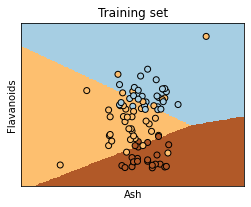

<ipython-input-468-c23cd41b9b9d>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


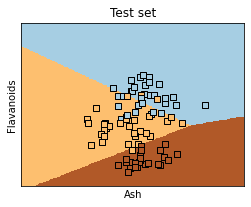

In [468]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X_red[:, 0].min() - .5, X_red[:, 0].max() + .5
y_min, y_max = X_red[:, 1].min() - .5, X_red[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_red_training[:, 0], X_red_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_red_test[:, 0], X_red_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()